In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import cv2 as cv
from IPython.display import display, HTML
from random import randint
from random import random
from PIL import Image


display(HTML("<style>.output_scroll { height:auto !important; }</style>"))

In [3]:
def k_means(image, iterations = 2, total_clusters = 2):
    centroids = []
    height, width, _ = image.shape
    while len(centroids) < total_clusters:
        centroid_i = randint(0, height - 1)
        centroid_j = randint(0, width - 1)
        centroid = image[centroid_i][centroid_j]
        is_exist = False
        for c in centroids:
            if (c[0] == centroid[0] and c[1] == centroid[1] and c[2] == centroid[2]):
                is_exist = True
                #print('повтор')
                break
        if not is_exist:
            centroids.append(centroid)
    #print(centroids)
    
    for iteration in range(iterations):
        #print(iteration)
        cluster_points = [[] for cluster in range(total_clusters)]
        cluster_points_pos = [[] for cluster in range(total_clusters)]
        
        for i in range(height):
            for j in range(width):
                distances_to_centroids = []
                for centroid in centroids:
                    pixel = image[i][j]
                    distance = 30 * (np.int64(centroid[0]) - np.int64(pixel[0]))**2 + 59 * (np.int64(centroid[1]) - np.int64(pixel[1]))**2 + 11 * (np.int64(centroid[2]) - np.int64(pixel[2]))**2
                    distances_to_centroids.append(distance)
                nearest_centroid = np.argmin(np.array(distances_to_centroids))
                #print(nearest_centroid)
                cluster_points[nearest_centroid].append(np.array(image[i][j]))
                cluster_points_pos[nearest_centroid].append((i, j))
                
        # найдем среднее значение rgb каналов для каждого кластера
        shifted_centroids = []
        for cluster_num in range(total_clusters):
            r, g, b = 0, 0, 0
            total_points = len(cluster_points[cluster_num])
            for i in range(total_points):
                r += cluster_points[cluster_num][i][0]
                g += cluster_points[cluster_num][i][1]
                b += cluster_points[cluster_num][i][2]
            
            shifted_centroids.append(np.array([r // total_points, g // total_points, b // total_points]))
        
        centroids = shifted_centroids
        #print("кластеры")
        #sum = 0 
        #for i in range(total_clusters):
        #    sum += len(cluster_points[i])
            #print(len(cluster_points[i]))             
    #print(height * width)
    #print(sum)
    
    new_image = image.copy()
    for cluster_num in range(total_clusters):
        for (i, j) in cluster_points_pos[cluster_num]:
            new_image[i][j] = centroids[cluster_num]
    
    return new_image

In [4]:
def list_of_kmeans_images(image, iterations = 3, k_nums = [3, 7, 20]):
    list_of_images = []
    
    for k in k_nums:
        new_image = k_means(image, iterations, k)
        print(" k-means для {} кластеров выполнено".format(k))
        list_of_images.append(new_image)
    
    return list_of_images   

 k-means для 2 кластеров выполнено
 k-means для 10 кластеров выполнено
 k-means для 20 кластеров выполнено
 k-means для 50 кластеров выполнено
 k-means для 100 кластеров выполнено


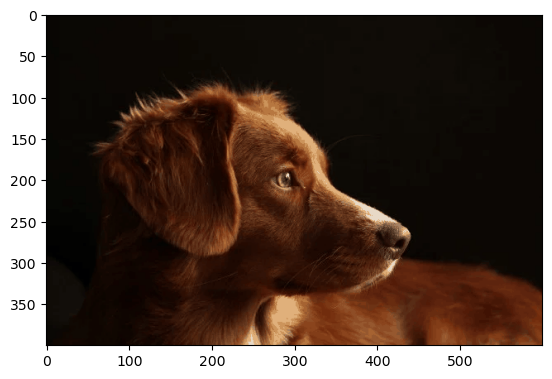

In [14]:
imagedog = cv.imread("dog.jpg")
imagedog = cv.cvtColor(imagedog, cv.COLOR_BGR2RGB)
k_images_dog = list_of_kmeans_images(imagedog, 5, [2, 10, 20, 50, 100])
plt.imshow(k_images_dog[4])

In [16]:
imageio.mimsave('dog.gif', k_images_dog, duration=1)

 k-means для 2 кластеров выполнено
 k-means для 10 кластеров выполнено
 k-means для 20 кластеров выполнено
 k-means для 50 кластеров выполнено
 k-means для 100 кластеров выполнено


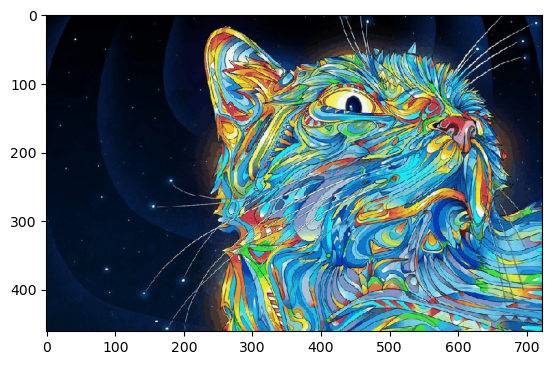

In [17]:
imagecat = cv.imread("colorcat.jpg")
imagecat = cv.cvtColor(imagecat, cv.COLOR_BGR2RGB)
k_images_cat = list_of_kmeans_images(imagecat, 5, [2, 10, 20, 50, 100])
plt.imshow(k_images_cat[4])

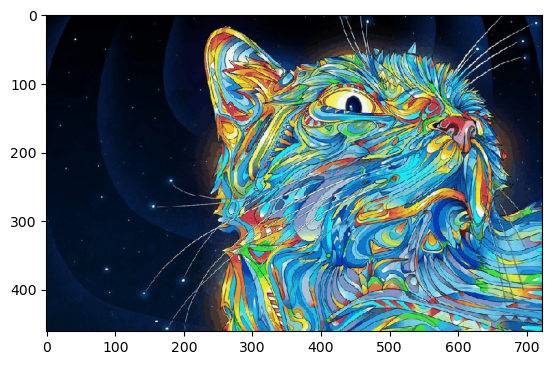

In [18]:
plt.imshow(k_images_cat[4])
imageio.mimsave('cat.gif', k_images_cat, duration=1)